In [1]:
import numpy as np
import pandas as pd

### Quiz_2
- 타이타닉 데이터를 가져와서 연령대별 생존률을 구하고 그래프를 그리세요

In [2]:
# 타이타닉 데이터 가져오기

In [4]:
titanic = pd.read_csv('train.csv')
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# ["Survived","Age"] 컬럼을 가지는 titanic_df 데이터 프레임을 만들고 Age가 NaN인 row 데이터를 삭제

In [16]:
titanic_df = pd.DataFrame(titanic, columns=["Survived", "Age"])
titanic_df.dropna(inplace=True)
titanic_df.reset_index(drop=True,inplace=True)
titanic_df.tail()

,Survived,Age
709,0,39.0
710,0,27.0
711,1,19.0
712,1,26.0
713,0,32.0


In [6]:
# Ages 컬럼을 만들고 Ages 컬럼에는 연령대에 대한 데이터 삽입

In [20]:
def ages(age):
    return (age // 10) * 10
titanic_df["Ages"] = titanic_df["Age"].apply(ages).astype("int")
titanic_df.tail()

,Survived,Age,Ages
709,0,39.0,30
710,0,27.0,20
711,1,19.0,10
712,1,26.0,20
713,0,32.0,30


In [8]:
# 연령대별로 생존률

In [25]:
titanic_df["Count"] = 1
titanic_df2 = titanic_df.pivot_table(values="Count", index=["Ages"], columns=["Survived"], aggfunc = np.sum)
titanic_df2

Survived,0,1
Ages,,
0,24.0,38.0
10,61.0,41.0
20,143.0,77.0
30,94.0,73.0
40,55.0,34.0
50,28.0,20.0
60,13.0,6.0
70,6.0,NaN
80,NaN,1.0


In [26]:
non_survived = titanic_df2[0]
survived = titanic_df2[1]
titanic_df2["survived_rate"] = round((survived / (non_survived + survived)) * 100, 2)
titanic_df2

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58
70,6.0,NaN,NaN
80,NaN,1.0,NaN


In [28]:
titanic_df2.dropna(inplace=True)
titanic_df2

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


In [12]:
# 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [30]:
titanic_df3 = titanic_df2.rename({0 : "non_survived", 1:"survived"},axis=1)
titanic_df3

Survived,non_survived,survived,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


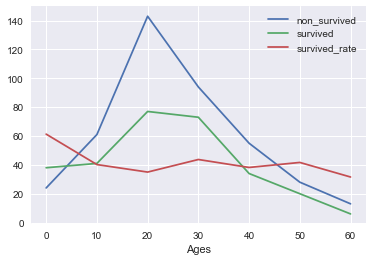

In [31]:
titanic_df3.plot()
plt.legend(loc='best')
plt.show()